In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

dataset=pd.read_csv('./communities.data',sep=',',engine='python')
list_of_rows = [list(row) for row in dataset.values]
#list_of_rows


In [44]:
df = pd.read_csv('crimedata.csv', encoding="latin-1", na_values='?')
df = df.rename(columns = {'Êcommunityname': 'communityName'})
df

,communityName,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,NaN,NaN,10,56216,3.07,6.87,61.68,15.23,...,1376.0,2268.72,2563.0,4225.82,489.0,806.25,34.0,56.06,545.75,7356.84
2211,Pinevillecity,LA,NaN,NaN,10,12251,2.68,21.18,76.65,1.52,...,104.0,860.43,574.0,4748.90,24.0,198.56,2.0,16.55,124.10,5824.44
2212,Yucaipacity,CA,NaN,NaN,10,32824,2.46,0.52,92.62,0.98,...,628.0,1709.26,895.0,2435.97,179.0,487.19,8.0,21.77,353.83,4654.20
2213,Beevillecity,TX,NaN,NaN,10,13547,2.89,3.37,69.91,0.90,...,192.0,1508.01,474.0,3722.90,13.0,102.10,1.0,7.85,691.17,5340.87


In [45]:
print(df.columns)

Index(['communityName', 'state', 'countyCode', 'communityCode', 'fold',
       'population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian',
       ...
       'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',
       'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop'],
      dtype='object', length=147)


### Dropping dependent Columns

In [46]:
df.drop(columns = ['communityName','countyCode', 'communityCode', 'fold','murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 'autoTheftPerPop','arsons','arsonsPerPop','nonViolPerPop'], inplace=True)
df

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,NJ,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,...,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN,41.02
1,PA,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,...,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.0,NaN,127.56
2,OR,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,...,10.6,2780.9,4.37,NaN,NaN,NaN,NaN,0.0,NaN,218.59
3,NY,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,...,5.2,3217.7,3.31,NaN,NaN,NaN,NaN,0.0,NaN,306.64
4,MN,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,...,11.5,974.2,0.38,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,CA,56216,3.07,6.87,61.68,15.23,29.86,15.46,30.16,14.34,...,16.7,3365.4,0.59,NaN,NaN,NaN,NaN,0.0,NaN,545.75
2211,LA,12251,2.68,21.18,76.65,1.52,1.29,17.36,31.23,16.97,...,7.3,1682.8,1.15,NaN,NaN,NaN,NaN,0.0,NaN,124.10
2212,CA,32824,2.46,0.52,92.62,0.98,11.00,11.81,20.96,9.53,...,27.5,1195.2,0.12,NaN,NaN,NaN,NaN,0.0,NaN,353.83
2213,TX,13547,2.89,3.37,69.91,0.90,62.11,17.16,30.01,14.73,...,6.3,2142.2,0.00,NaN,NaN,NaN,NaN,0.0,NaN,691.17


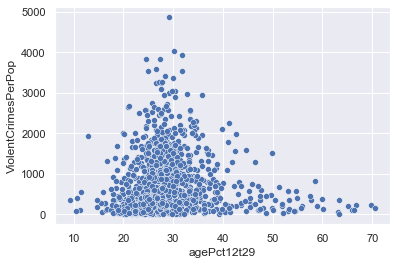

In [47]:
import seaborn as sns
ax = sns.scatterplot(data = df, x='agePct12t29',y='ViolentCrimesPerPop' )
plt.show()

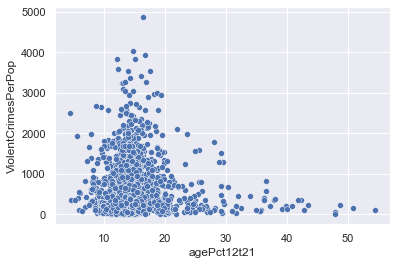

In [48]:
ax = sns.scatterplot(data = df, x='agePct12t21',y='ViolentCrimesPerPop' )
plt.show()

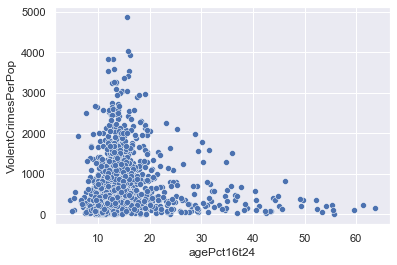

In [49]:
ax = sns.scatterplot(data = df, x='agePct16t24',y='ViolentCrimesPerPop' )
plt.show()

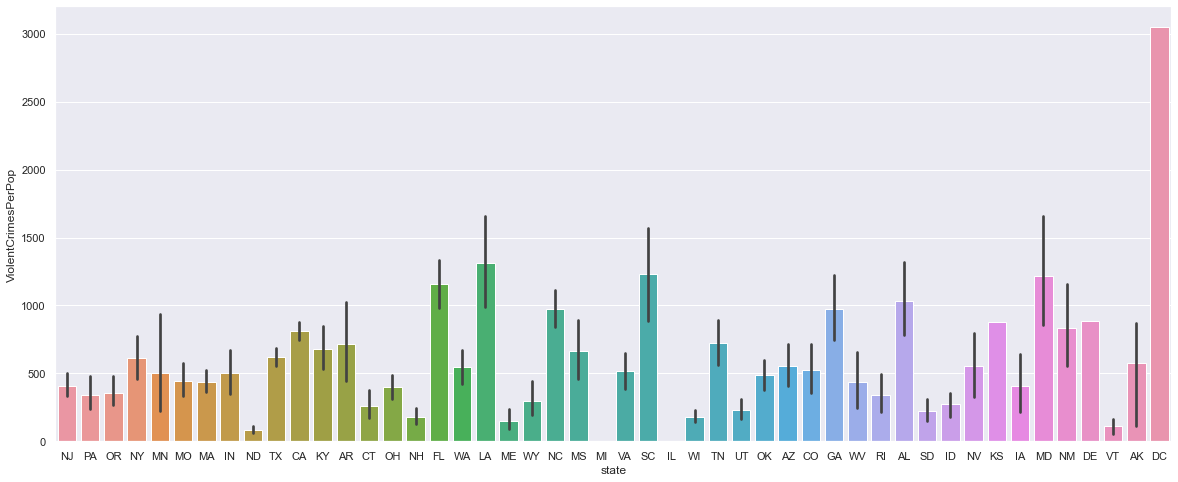

In [50]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x ="state", y='ViolentCrimesPerPop', data = df)

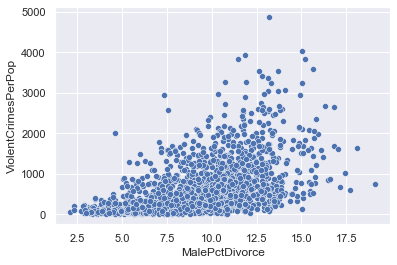

In [51]:
ax = sns.scatterplot(data = df, x='MalePctDivorce',y='ViolentCrimesPerPop' )
plt.show()

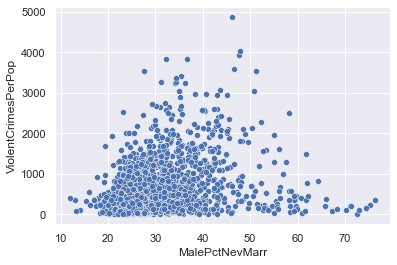

In [52]:
ax = sns.scatterplot(data = df, x='MalePctNevMarr',y='ViolentCrimesPerPop' )
plt.show()

In [53]:
attrib = pd.read_csv('attributes.csv', delim_whitespace = True)
data = pd.read_csv('./communities.data',sep=',',engine='python', names = attrib['attributes'])
list_of_rows = [list(row) for row in dataset.values]
data.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Removing non predictive attributes

In [54]:
data = data.drop(columns=['state','county',
                          'community','communityname',
                          'fold'], axis=1)
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [55]:
from pandas import DataFrame

data = data.replace('?', np.nan)
feat_miss = data.columns[data.isnull().any()]
print(feat_miss)
print(feat_miss.shape)

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')
(23,)


### 23 attributes contain missing values

In [56]:
data[feat_miss[0:13]].describe()

,OtherPerCap,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp
count,1993,319,319,319,319,319,319,319,319,319,319,319,319
unique,97,38,52,34,55,44,59,75,52,76,74,73,54
top,0,0.02,0.2,0.98,0.14,0.02,0.14,0.23,0.2,0.78,0.97,0,0
freq,129,80,19,81,17,55,23,15,19,12,11,23,72


In [57]:
data[feat_miss[13:23]].describe()

,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop
count,319,319,319,319,319,319,319,319,319,319
unique,50,72,30,15,77,63,38,72,3,51
top,0,0.07,0.03,0.57,0.19,0.02,0.02,0.74,0,0.12
freq,189,14,48,54,12,27,69,13,126,22



OtherPerCap has only one missing value and will be filled by a mean value using Imputer from sklearn.preprocessing. The others features present many missing values and will be removed from the data set.
[https://scikit-learn.org/stable/modules/impute.html]

In [58]:
data[['OtherPerCap']]

,OtherPerCap
0,0.36
1,0.22
2,0.28
3,0.36
4,0.51
...,...
1989,0.36
1990,0.23
1991,0.22
1992,0.27


In [59]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')

imputer = imputer.fit(data[['OtherPerCap']])
data['OtherPerCap'] = imputer.transform(data[['OtherPerCap']])
data['OtherPerCap']


0       0.36
1       0.22
2       0.28
3       0.36
4       0.51
        ... 
1989    0.36
1990    0.23
1991    0.22
1992    0.27
1993    0.25
Name: OtherPerCap, Length: 1994, dtype: float64

In [60]:
data = data.dropna(axis=1)
print(data.shape)
data

(1994, 101)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,0.19


In [61]:
data.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


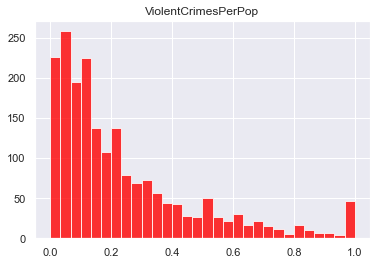

In [62]:
data.hist(column = ['ViolentCrimesPerPop'], bins = 30, color = 'red', alpha = 0.8)
plt.show()

In [63]:
X = data.iloc[:, 0:100].values
y = data.iloc[:, 100].values

from sklearn.model_selection import train_test_split

seed = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

print(X.shape)
print(y.shape)

(1994, 100)
(1994,)


In [64]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Amount of variance: [25.20144365 16.45250595  9.49203575  7.5706022   5.82744092  4.29215464
  3.35028839  2.87773923  2.05181745  1.57906507  1.55975001  1.46898576
  1.38936541  1.03011703]
Sum of the variance: 84.14
Percentage of variance: [0.25183378 0.16440712 0.09485231 0.07565175 0.05823264 0.04289078
 0.03347887 0.02875676 0.02050347 0.01577933 0.01558632 0.01467933
 0.01388369 0.01029379]
Sum of the percentage of variance: 0.84


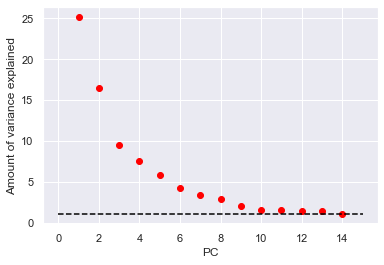

(1395, 14)


In [65]:
from sklearn.decomposition import PCA

c = 14
pca = PCA(n_components = c)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print("Amount of variance: %s" % pca.explained_variance_)
print("Sum of the variance: %s" % sum(pca.explained_variance_).round(2))

print("Percentage of variance: %s" % pca.explained_variance_ratio_)
print("Sum of the percentage of variance: %s" % sum(pca.explained_variance_ratio_).round(2))


plt.scatter(np.arange(1,(c+1)),pca.explained_variance_, c = 'red')
plt.plot((0,15), (1,1), color = 'black', linestyle = 'dashed')
plt.xlabel('PC')
plt.ylabel('Amount of variance explained')
plt.show()
print(X_train.shape)

In [66]:
def myplot(XX, yy):
    from sklearn.model_selection import ShuffleSplit
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=seed)

    results = []
    names = []

    for name, model in models:
        cv_results = cross_val_score(model, XX, yy, cv = cv, scoring = make_scorer(r2_score))
        results.append(cv_results)
        names.append(name)
        msg = "%s: %.3f (+/- %.3f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    fig = plt.figure()
    fig.suptitle('R2')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = []
models.append(('LR', LinearRegression()))
models.append(('SVR', SVR()))
models.append(('DTR', DecisionTreeRegressor(random_state=seed)))
models.append(('RFR (100 Trees)', RandomForestRegressor(n_estimators=100, random_state=seed)))

LR: 0.642 (+/- 0.028)
SVR: 0.614 (+/- 0.032)
DTR: 0.237 (+/- 0.086)
RFR (100 Trees): 0.610 (+/- 0.023)


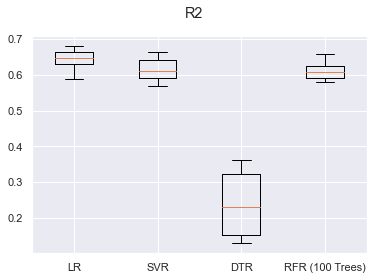

In [68]:
myplot(X_train, y_train)

Scores results of the cross-validation indicate that Linear Regression has the best performance among the analyzed models and will be used for generalization. This approach is also called Principal Component Regression, i.e. a set of principal components, are used as the predictors in a linear regression model.


### RANSAC

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

#model = LinearRegression(fit_intercept=True)
model = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_loss',
                         residual_threshold=0.55,
                         random_state=seed)


model.fit(X_train, y_train)

y_pred = model.predict(X_train)
# Correction: y_pred (per capita violent crimes) can not assume negative values
y_pred[y_pred < 0] = 0

K = X_train.shape[1]+1
rms = np.sqrt(sum((y_train-y_pred)**2)/(len(y_train)-K))



$$rms = \hat\sigma = \sqrt{\frac{\sum\hat{e}_i^{2}}{N-K}},$$


R^2: 0.6503
MSE: 0.0191
MAE: 0.0965
rms: 0.1388


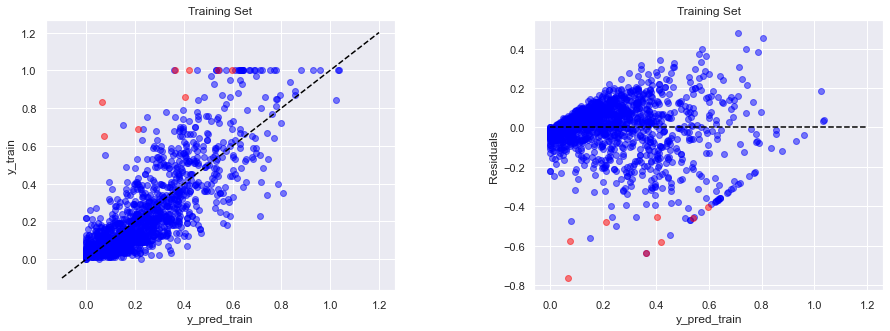

In [70]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('R^2: %.4f' % r2_score(y_train,y_pred))
print('MSE: %.4f' % mean_squared_error(y_train,y_pred))
print('MAE: %.4f' % mean_absolute_error(y_train,y_pred))
print('rms: %.4f' % rms)

inlier_mask = model.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

plt.figure(figsize=(15, 10))
ax1 = plt.subplot(121)
ax1.scatter(y_pred[inlier_mask], y_train[inlier_mask], c = 'blue', alpha = 0.5)
ax1.scatter(y_pred[outlier_mask], y_train[outlier_mask], c = 'red', alpha = 0.5)
ax1.plot((-0.1,1.2),(-0.1,1.2), c = 'black', linestyle = 'dashed')
ax1.set_title('Training Set')
ax1.set_xlabel('y_pred_train')
ax1.set_ylabel('y_train')

ax2 = plt.subplot(122)
ax2.scatter(y_pred[inlier_mask], y_pred[inlier_mask] - y_train[inlier_mask], c = 'blue', alpha = 0.5)
ax2.scatter(y_pred[outlier_mask], y_pred[outlier_mask] - y_train[outlier_mask], c = 'red', alpha = 0.5)
ax2.plot((0,1.2),(0,0), c = 'black', linestyle = 'dashed')
ax2.set_title('Training Set')
ax2.set_xlabel('y_pred_train')
ax2.set_ylabel('Residuals')

plt.subplots_adjust(wspace=0.4, top=0.5)
plt.show()

R^2: 0.6248
MSE: 0.0201
MAE: 0.0976
rms: 0.1437


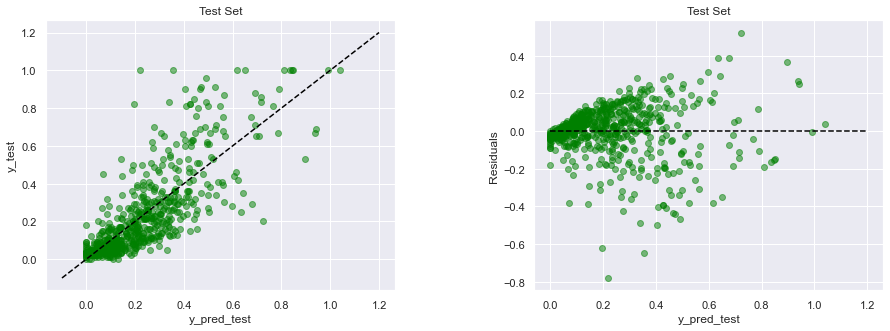

In [71]:
y_pred_test = model.predict(X_test)
# Correction: y_pred (per capita violent crimes) can not assume negative values
y_pred_test[y_pred_test < 0] = 0

nrp = X_test.shape[1]+1
rms = np.sqrt(sum((y_test-y_pred_test)**2)/(len(y_test)-nrp))

print('R^2: %.4f' % r2_score(y_test,y_pred_test))
print('MSE: %.4f' % mean_squared_error(y_test,y_pred_test))
print('MAE: %.4f' % mean_absolute_error(y_test,y_pred_test))
print('rms: %.4f' % rms)

plt.figure(figsize=(15, 10))
ax1 = plt.subplot(121)
ax1.scatter(y_pred_test, y_test, c = 'green', alpha = 0.5)
ax1.plot((-0.1,1.2),(-0.1,1.2), c = 'black', linestyle = 'dashed')
ax1.set_title('Test Set')
ax1.set_xlabel('y_pred_test')
ax1.set_ylabel('y_test')

ax2 = plt.subplot(122)
ax2.scatter(y_pred_test, y_pred_test - y_test, c = 'green', alpha = 0.5)
ax2.plot((0,1.2),(0,0), c = 'black', linestyle = 'dashed')
ax2.set_title('Test Set')
ax2.set_xlabel('y_pred_test')
ax2.set_ylabel('Residuals')

plt.subplots_adjust(wspace=0.4, top=0.5)
plt.show()

## Recursive Feature Elimination

In [72]:
from sklearn.model_selection import ShuffleSplit
X = data.iloc[:, 0:100].values
y = data.iloc[:, 100].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=seed)

estimator = LinearRegression()
selector = RFECV(estimator, step=1, cv=cv, scoring = 'r2')
selector = selector.fit(X_train, y_train)

In [73]:
print("Optimal number of features : %d" % selector.n_features_)
mask = selector.get_support()

Optimal number of features : 33


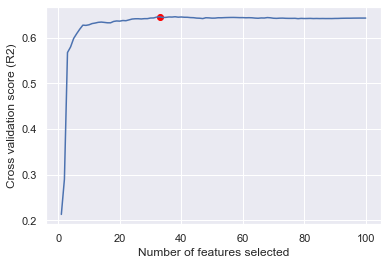

In [74]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (R2)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.scatter(selector.n_features_,np.max(selector.grid_scores_), c = 'red')
plt.show()

In [75]:
# Applying the mask
X_train = X_train[:, mask]
X_test = X_test[:, mask]

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = []
models.append(('LR', LinearRegression()))
models.append(('SVR', SVR()))
models.append(('DTR', DecisionTreeRegressor(random_state=seed)))
models.append(('RFR (100 Trees)', RandomForestRegressor(n_estimators=100, random_state=seed)))

LR: 0.664 (+/- 0.026)
SVR: 0.656 (+/- 0.031)
DTR: 0.290 (+/- 0.077)
RFR (100 Trees): 0.649 (+/- 0.026)


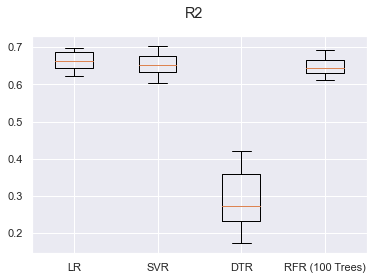

In [77]:
myplot(X_train, y_train)

## RANSAC

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_loss',
                         residual_threshold=0.55,
                         random_state=seed)


model.fit(X_train, y_train)

y_pred = model.predict(X_train)
# Correction: y_pred (per capita violent crimes) can not assume negative values
y_pred[y_pred < 0] = 0

K = X_train.shape[1]+1
rms = np.sqrt(sum((y_train-y_pred)**2)/(len(y_train)-K))

R^2: 0.6767
MSE: 0.0176
MAE: 0.0922
rms: 0.1344


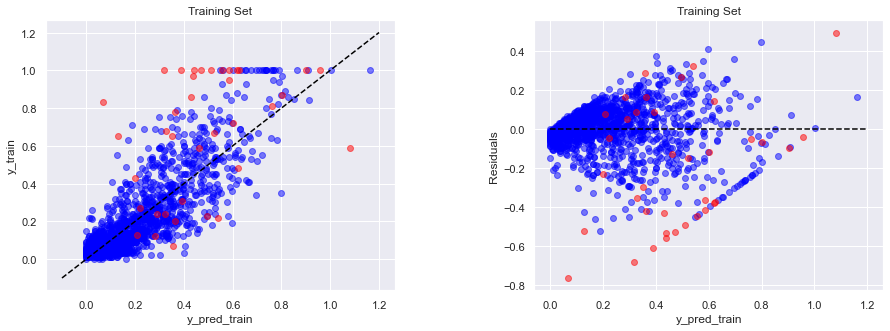

In [79]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('R^2: %.4f' % r2_score(y_train,y_pred))
print('MSE: %.4f' % mean_squared_error(y_train,y_pred))
print('MAE: %.4f' % mean_absolute_error(y_train,y_pred))
print('rms: %.4f' % rms)

inlier_mask = model.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

plt.figure(figsize=(15, 10))
ax1 = plt.subplot(121)
ax1.scatter(y_pred[inlier_mask], y_train[inlier_mask], c = 'blue', alpha = 0.5)
ax1.scatter(y_pred[outlier_mask], y_train[outlier_mask], c = 'red', alpha = 0.5)
ax1.plot((-0.1,1.2),(-0.1,1.2), c = 'black', linestyle = 'dashed')
ax1.set_title('Training Set')
ax1.set_xlabel('y_pred_train')
ax1.set_ylabel('y_train')

ax2 = plt.subplot(122)
ax2.scatter(y_pred[inlier_mask], y_pred[inlier_mask] - y_train[inlier_mask], c = 'blue', alpha = 0.5)
ax2.scatter(y_pred[outlier_mask], y_pred[outlier_mask] - y_train[outlier_mask], c = 'red', alpha = 0.5)
ax2.plot((0,1.2),(0,0), c = 'black', linestyle = 'dashed')
ax2.set_title('Training Set')
ax2.set_xlabel('y_pred_train')
ax2.set_ylabel('Residuals')

plt.subplots_adjust(wspace=0.4, top=0.5)
plt.show()

R^2: 0.6544
MSE: 0.0185
MAE: 0.0938
rms: 0.1402


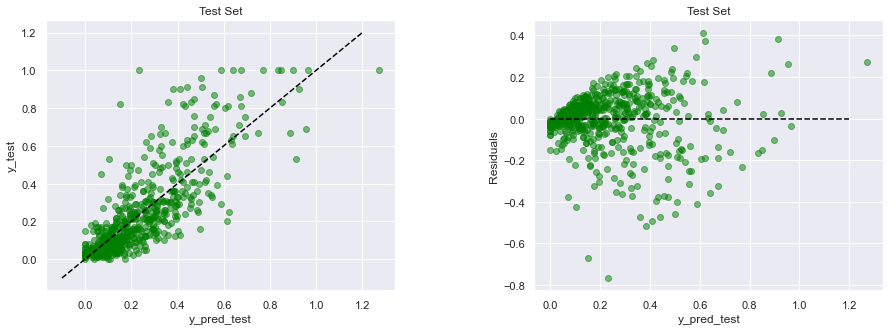

In [80]:
y_pred_test = model.predict(X_test)
# Correction: y_pred (per capita violent crimes) can not assume negative values
y_pred_test[y_pred_test < 0] = 0

nrp = X_test.shape[1]+1
rms = np.sqrt(sum((y_test-y_pred_test)**2)/(len(y_test)-nrp))

print('R^2: %.4f' % r2_score(y_test,y_pred_test))
print('MSE: %.4f' % mean_squared_error(y_test,y_pred_test))
print('MAE: %.4f' % mean_absolute_error(y_test,y_pred_test))
print('rms: %.4f' % rms)

plt.figure(figsize=(15, 10))
ax1 = plt.subplot(121)
ax1.scatter(y_pred_test, y_test, c = 'green', alpha = 0.5)
ax1.plot((-0.1,1.2),(-0.1,1.2), c = 'black', linestyle = 'dashed')
ax1.set_title('Test Set')
ax1.set_xlabel('y_pred_test')
ax1.set_ylabel('y_test')

ax2 = plt.subplot(122)
ax2.scatter(y_pred_test, y_pred_test - y_test, c = 'green', alpha = 0.5)
ax2.plot((0,1.2),(0,0), c = 'black', linestyle = 'dashed')
ax2.set_title('Test Set')
ax2.set_xlabel('y_pred_test')
ax2.set_ylabel('Residuals')

plt.subplots_adjust(wspace=0.4, top=0.5)
plt.show()

#### Conclusion: Feature ranking with recursive feature elimination showed to be the best method analysed to select predictors of ViolentCrimesPerPop. The best generalization on the test set was obtained using a robust linear regression estimator (RANSAC). The minimum rms = 0.140 (MSE = 0.019) was obtained for $R^2$ = 0.654 on the test set.

In [82]:
cols = list(data.iloc[:, 0:100].columns[mask])
# cm = np.corrcoef(data[cols].values.T)

# fig = plt.figure(figsize = (15, 15))
# sns.set(font_scale=1)
# hm = sns.heatmap(cm,
#                  cbar=False,
#                  annot=True,
#                  square=True,
#                  fmt='.2f',
#                  annot_kws={'size': 11},
#                  yticklabels=cols,
#                  xticklabels=cols)
# plt.show()
print(cols)

['population', 'racepctblack', 'agePct12t29', 'numbUrban', 'medIncome', 'pctWWage', 'pctWInvInc', 'medFamInc', 'perCapInc', 'whitePerCap', 'PctEmploy', 'MalePctDivorce', 'MalePctNevMarr', 'TotalPctDiv', 'PctKids2Par', 'PctWorkMom', 'NumImmig', 'PctRecImmig8', 'PctRecImmig10', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'HousVacant', 'PctHousOwnOcc', 'OwnOccLowQuart', 'OwnOccMedVal', 'RentLowQ', 'RentMedian', 'MedRent', 'MedOwnCostPctIncNoMtg', 'NumStreet']
